<h1 align="center">Arbol de decisión de compra de Bitcoin y Ethereum</h1>
<h2 align="center">MEA519-01</h2>
<h3 align="center">Autor: Pablo Perez, Wittenberg Corniel</h3>
<h3 align="center">ID: 1064601, 1107854</h3>

In [15]:
# Librerias necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Carga de datos
ruta_archivo = r"C:\Users\pablo\OneDrive\Documentos\data_ln.xlsx"
data = pd.read_excel(ruta_archivo)

In [5]:
# Creación de la variable objetivo (compra (1)/no compra (2))
data['Decision'] = (data['Precio ETH'].shift(-1) > data['Precio ETH']).astype(int)

# Elimina la última fila ya que no tenemos información de compra/no compra para ella
data = data[:-1]

In [6]:
# División de datos en entrenamiento y prueba
X = data[['Precio BTC']]
y = data['Decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Creación y entrenamiento del modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Exactitud (Accuracy): {accuracy}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Reporte de Clasificación:\n{classification_rep}")

Exactitud (Accuracy): 0.6875
Matriz de Confusión:
[[6 1]
 [4 5]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.83      0.56      0.67         9

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16



La exactitud es del 68.75%, lo que significa que el modelo acertó en el 68.75% de las decisiones de compra o no compra de ETH en función de los movimientos de BTC.

La matriz de confusión muestra que:

6 muestras fueron clasificadas correctamente como "no compra" (verdaderos negativos).
5 muestras fueron clasificadas correctamente como "compra" (verdaderos positivos).
1 muestra fue clasificada incorrectamente como "compra" cuando en realidad era "no compra" (falso positivo).
4 muestras fueron clasificadas incorrectamente como "no compra" cuando en realidad eran "compra" (falsos negativos).

Para la clase 0, la precisión es del 60%, y para la clase 1, la precisión es del 83%.

Para la clase 0, el F1-score es del 71%, y para la clase 1, el F1-score es del 67%

Macro avg: Calcula las métricas promedio sin tener en cuenta el desequilibrio de clases. En este caso, el F1-score promedio ponderado (macro avg) es del 69%.

Weighted avg: Calcula las métricas promedio ponderadas por el número de muestras en cada clase. En este caso, el F1-score promedio ponderado (weighted avg) es del 68%.

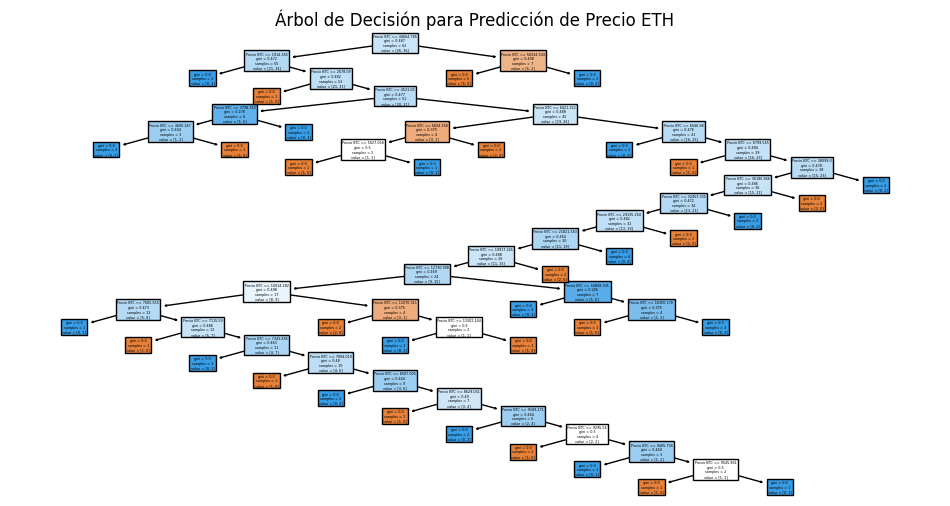

In [17]:
# Visualización gráfica del árbol de decisión
plt.figure(figsize=(12, 6))
from sklearn.tree import plot_tree
plot_tree(modelo_arbol, filled=True, feature_names=['Precio BTC'])
plt.title("Árbol de Decisión para Predicción de Compra de Precio ETH")

# Guardar el gráfico en formato JPG
plt.savefig("arbol_decision_eth_btc.jpg", dpi=300, bbox_inches='tight')

plt.show()